# 계단 함수

In [3]:
import numpy as np
x = np.array([-1., 1., 2.])
y = x > 0
y


array([False,  True,  True])

In [6]:
def step_function(x):
    y = x > 0 
    return y.astype(np.int)

step_function(x)

array([0, 1, 1])

# 시그모이드 함수

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1., 1., 2., np.inf])
sigmoid(x)



array([0.26894142, 0.73105858, 0.88079708, 1.        ])

# ReLU 함수

In [9]:
def relu(x):
    return np.maximum(0, x)

print(relu(-1), relu(2))

0 2


# Dying ReLU
ReLU에서는 forwardPropagation에서 어떤 뉴런에서든지 음수값이 한번 들어오게되면, Backpropagation에서 기울기가 0이 되어버리므로 0이 곱해지며 해당 노드가 가중치 학습이 되지 않게 된다.

근데 왜 ReLU를 그냥 사용해도 학습이 되는걸까??
실제로, weight을 양수로 초기화 했을때 오히려 학습 정확도에 차이가 거의 없다. 이를 보완한 Leaky ReLU 함수를 써도 정확도 차이가 크지 않ㄴ다.
Dying ReLU 현상이 학습 정확도에 드라마틱한 영향을 미치지 않는다는 것이다.
그 이유에 대한 답을 찾아보다가 의외의 사실을 발견했다. Dying ReLU 현상이 오히려 뉴럴넷에 대해서 ReLU가 가지는 큰 강점으로 작용한다는 것이다. 풀어서 이야기하면 sparsity(희소성)를 창출하는 일반화(regularization) 경향을 증가시킨다는 뜻이다.(논문을 번역하다보니 어째 이 말이 더 어렵다..) 
아무튼 아래 논문을 읽어보면 sparsity가 높아질수록 inherent pattern(숨겨져 있는 패턴)을 찾아내는데 유용하다고 되어있다.
아는 데까지 설명하자면 데이터의 overfitting을 방지해주기 위해 특정 weight을 작게 줌으로써 Cost 함수의 기울기를 펴는 것(flatten)이 일반화라고만 알고 있다. 

즉 ReLU Function의 random weight이 노드를 죽이는 현상이 거시적 관점에서는 일종의 일반화 방식(Sparsity-Inducing Regularization) 으로써 작용한다는 뜻이다. 말하자면 node들을 솎아서 사용함으로써 network의 상관성을 줄임여 Overfiting을 방지하는 Drop-out 과 비슷한 역할을 하는 것이다. (실제로 Drop-out을 구현 할때에는 drop-out 확률 만큼 random하게 노드를 선택해 그 노드들은 0을 곱해주는 식으로 연산이 진행된다니 비슷한 원리가 아닐 수 없다

https://brunch.co.kr/@kdh7575070/27

# others


시그모이드 함수(Sigmoid function)  : 기울기 소실큼, non-centered

하이퍼볼릭탄젠트 함수(Hyperbolic tangent function) : sigmoid 함수를 재활용하기 위한 함수. sigmoid의 범위를 -1에서 1로 넓혔다. 기울기 소실큼(sigmoid 보다는 낫다), zero-centered

렐루 함수(ReLU) : max(0, x)처럼 음수에 대해서만 0으로 처리하는 함수. 기울기 소실 적음, 입력값이 음수면 기울기도 0이 됨 => 죽은 렐루(dying ReLU) 발생


리키 렐루(Leaky ReLU) : ReLU 함수의 변형으로 입력 값이 음수일때만 줄여서 출력하는 함수. 음수일때 0이 아니라 ax로 변경 (a는 leaky parameter, ex) a=0.001) 


ELU - ReLU를 0이 아닌 다른 값을 기준으로 사용하는 함수


maxout - 두 개의 W와 b 중에서 큰 값이 나온 것을 사용하는 함수



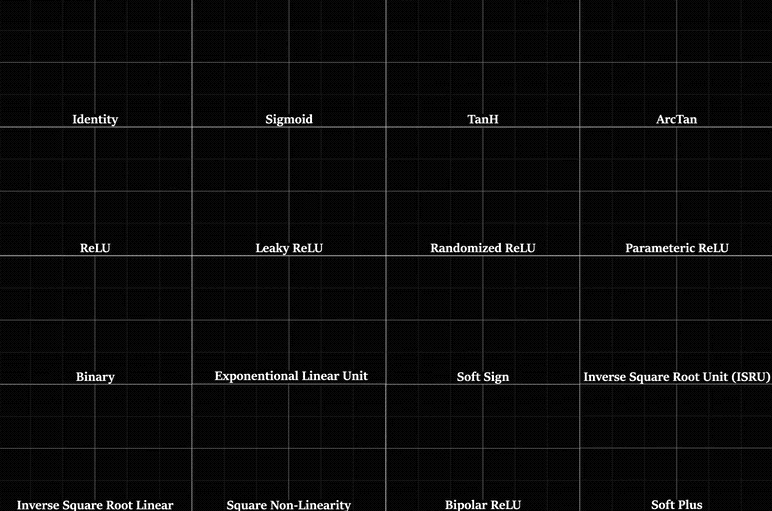

# Others 2 ( GELU - Gaussian Error Linear Unit )

This activation function takes the form of this equation:

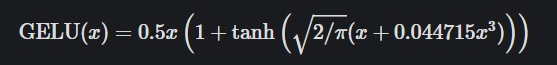

So it's just a combination of some functions (e.g. hyperbolic tangent tanh) and approximated numbers – there is not much to say about it. What is more interesting, is looking at the graph for the gaussian error linear unit:



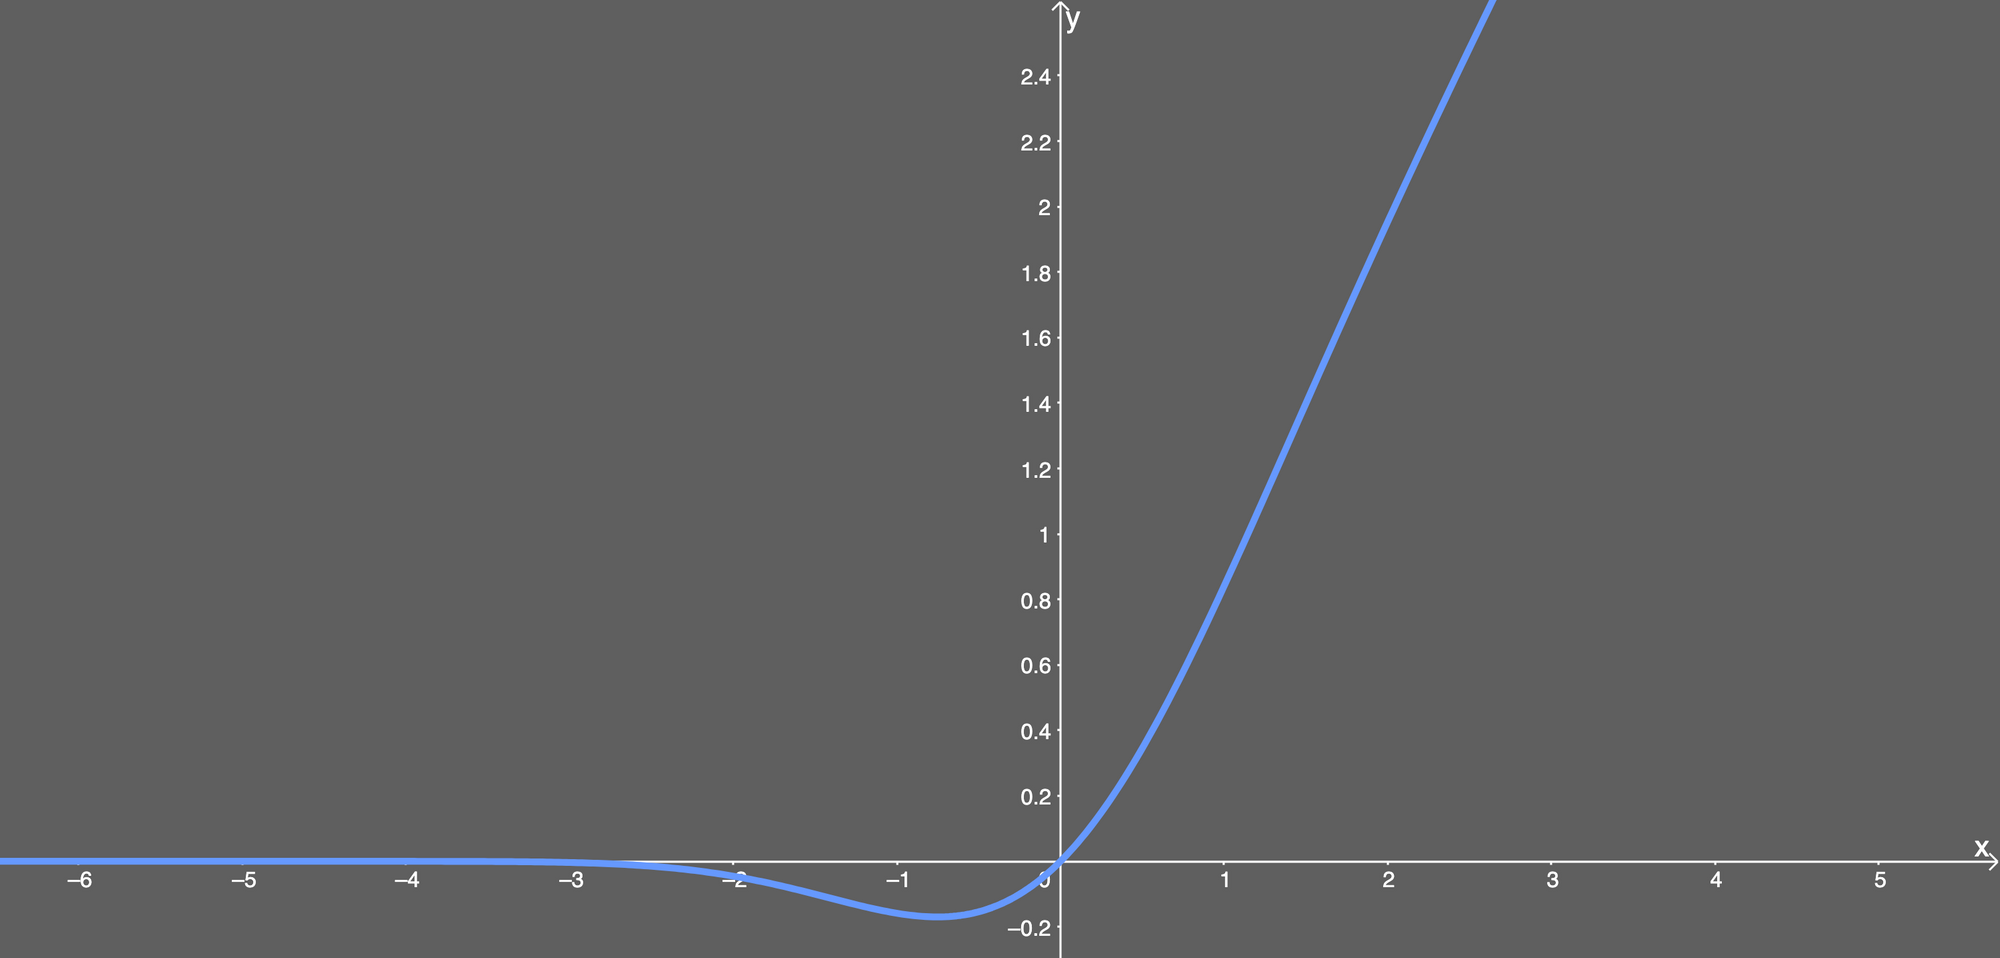

# 신경망 구현 
## (3층 신경망, 2입력노드, 히든레이어 2계층(3노드+2노드), 2출력노드)

In [18]:
def init_network():
    network = {}
    network['W1'] = np.array([[.1, .3, .5], [.2, .4, .6]])
    network['b1'] = np.array([.1, .2, .3])
    network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
    network['b2'] = np.array([.1, .2])
    network['W3'] = np.array([[.1, .3], [.2, .4]])
    network['b3'] = np.array([.1, .2])

    return network

# def identity_function(x):return x

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1  ## (1X2) @ (2X3) = (1X3)
    z1 = sigmoid(a1)      
    a2 = np.dot(z1, W2) + b2  ## (1X3) @ (3X2) = (1X2)
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3  ## (1X2) @ (2X2) = (1X2)
#     y = identity_function(a3)
    y = a3 

    return y

In [21]:
network = init_network()
x = np.array([1., .5])
forward(network, x)

array([0.31682708, 0.69627909])

# 소프트 맥스

In [ ]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x
    

In [13]:
import numpy as np
def softmax(list_of_x, i):
    print('exp_x:', np.exp(list_of_x[i]))
    return np.exp(list_of_x[i]) / np.sum(np.exp(list_of_x))

y = [0.11111111111, 0.3, 0.4, 0.18888888889, 0.1]
softmax(y, 1)

exp_x: 1.3498588075760032


0.21521022006514684

In [26]:
a= [1,2,3]
print(np.exp(a))
print(softmax(a))
print(np.sum(softmax))

[ 2.71828183  7.3890561  20.08553692]
[0.09003057 0.24472847 0.66524096]
<function softmax at 0x000001FC347731F8>


# 오버플로우를 개선한 소프트맥스
### 컴퓨터로 계산할 때에는 오버플로 문제가 발생할 수 있다. 오버플로란 메모리 용량을 넘어선 자릿수 계산이 생기는 오류를 말한다.

# ** log(C)가 음수라면, 절대적 수치가 줄어든다.
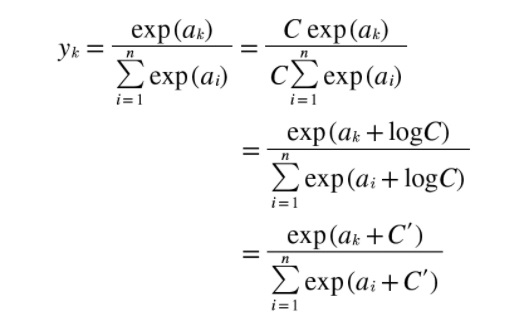

In [22]:
def softmax_no_ovf(x_list, i):
    c = np.max(x_list) ## 입력신호중 최대값을 C로 지정 (x는 0~1사이의 값으로 입력될 것임)    exp_x = np.exp(x - c)
    c_prime = np.log(c)  ## 자연로그 취함
    if c>=1:        
        exp_x = np.exp(x_list[i]-c_prime)  ## 부호 바꿈
        print('exp_x:', exp_x)
        sum_exp_x = np.sum(np.exp(x_list-c_prime))
    elif c<1:
        exp_x = np.exp(x_list[i]+c_prime)  ## 부호 바꿈
        print('exp_x:', exp_x)
        sum_exp_x = np.sum(np.exp(x_list+c_prime))
    
    return exp_x / sum_exp_x

y = [0.11111111111, 0.3, 0.4, 0.18888888889, 0.1]
z = [300, 200, 500, 100, 400]

print(softmax_no_ovf(y, 1))
print(softmax(y,1))  
print('\n')
print(softmax_no_ovf(z, 1))
print(softmax(z,1))  

exp_x: 0.5399435230304013
0.21521022006514684
exp_x: 1.3498588075760032
0.21521022006514684


exp_x: 1.4451947536251529e+84
5.148200222412161e-131
exp_x: 7.225973768125749e+86
5.148200222412013e-131


4.605170185988092